<a href="https://colab.research.google.com/github/bakkso/Data-Analysis-Programming/blob/main/dap_w7_pub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_eco = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/economics.csv")
df_car = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Cars93.csv")
print(df_eco)
print(df_car)

           date      pce     pop  psavert  uempmed  unemploy
0    1967-07-01    507.4  198712     12.5      4.5      2944
1    1967-08-01    510.5  198911     12.5      4.7      2945
2    1967-09-01    516.3  199113     11.7      4.6      2958
3    1967-10-01    512.9  199311     12.5      4.9      3143
4    1967-11-01    518.1  199498     12.5      4.7      3066
..          ...      ...     ...      ...      ...       ...
569  2014-12-01  12122.0  320201      5.0     12.6      8688
570  2015-01-01  12080.8  320367      5.5     13.4      8979
571  2015-02-01  12095.9  320534      5.7     13.1      8705
572  2015-03-01  12161.5  320707      5.2     12.2      8575
573  2015-04-01  12158.9  320887      5.6     11.7      8549

[574 rows x 6 columns]
   Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0         Acura  Integra    Small       12.9   15.9       18.8        25   
1         Acura   Legend  Midsize       29.2   33.9       38.7        18   
2          Audi 

## **1. 시계열 데이터 기초**

---

시계열 데이터는 특정 주기에 따라 기록된 관측의 일련을 말하며, Pandas에서는 `Timestamp`타입으로 이를 다룹니다 (`datetime` 등으로 나타날 때도 있습니다. `to_datetime()` API 문서와 [이 StackOverflow 답변](https://stackoverflow.com/questions/13703720/converting-between-datetime-timestamp-and-datetime64/46921593#46921593)을 확인해보세요. 라이브러리간 시간 정보를 다루는 방법의 차이 때문에 발생하는 현상입니다. 일반적으로 `pandas`에 대해 `datetime`이라고 하면 `Timestamp`를 말하는 것이고, `numpy`에 대해 `datetime`이라고 하면 `datetime64`을 말한다고 생각하세요).

---

[pd.to_datetime()](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) <br>
[pd.DateOffset()](https://pandas.pydata.org/docs/reference/api/pandas.tseries.offsets.DateOffset.html)

In [ ]:
df1 = df_eco.copy(deep = True)
df1['date']

0      1967-07-01
1      1967-08-01
2      1967-09-01
3      1967-10-01
4      1967-11-01
          ...    
569    2014-12-01
570    2015-01-01
571    2015-02-01
572    2015-03-01
573    2015-04-01
Name: date, Length: 574, dtype: object

In [ ]:
# 1-1. df1은 시계열 값을 가진 열(df1.date)을 포함하지만, csv를 불러올 당시 해당 열을 명시하지 않았기 때문에 object타입으로 되어있습니다. 해당 열을 datetime타입으로 변경하세요.
df1['date'] = pd.to_datetime(df1['date'])

###### 아래는 수정하지 마세요.
df1['date']

0     1967-07-01
1     1967-08-01
2     1967-09-01
3     1967-10-01
4     1967-11-01
         ...    
569   2014-12-01
570   2015-01-01
571   2015-02-01
572   2015-03-01
573   2015-04-01
Name: date, Length: 574, dtype: datetime64[ns]

In [ ]:
# 1-2. 주어진 데이터는 매달 1일에 수집된 것으로 되어있는데, 매달 15일에 수집되었다는 사실을 나중에 알았다는 상황이 생겼다고 가정합니다.
# 이를 시정하기 위해, 각 행의 datetime에 14일을 더해(혹은 15일로 직접 지정해) yyyy-mm-15로 값을 수정하세요.
df1['date'] += pd.DateOffset(day = 15)

###### 아래는 수정하지 마세요.
df1['date']

<ipython-input-23-e2e82fb229da>:3: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  df1['date'] += pd.DateOffset(day = 15)


0     1967-07-15
1     1967-08-15
2     1967-09-15
3     1967-10-15
4     1967-11-15
         ...    
569   2014-12-15
570   2015-01-15
571   2015-02-15
572   2015-03-15
573   2015-04-15
Name: date, Length: 574, dtype: datetime64[ns]

In [ ]:
# 1-3. 위의 정보에 추가로, 데이터가 오전 8시를 기준으로 수집되었다는 것을 알았다는 상황이 생겼다고 가정합니다.
# 이를 시정하기 위해, 각 행의 datetime에 8시간을 더해 yyyy-mm-15 08:00:00으로 값을 수정하세요.
df1['date'] += pd.DateOffset(hours = 8)
###### 아래는 수정하지 마세요.
df1['date']

0     1967-07-15 08:00:00
1     1967-08-15 08:00:00
2     1967-09-15 08:00:00
3     1967-10-15 08:00:00
4     1967-11-15 08:00:00
              ...        
569   2014-12-15 08:00:00
570   2015-01-15 08:00:00
571   2015-02-15 08:00:00
572   2015-03-15 08:00:00
573   2015-04-15 08:00:00
Name: date, Length: 574, dtype: datetime64[ns]

In [ ]:
# 1-4. rec이라는 레코드가 추가로 주어졌는데, 이 레코드의 'date'가 'yyyy-mm-dd' 형태의 object 혹은 datetime타입 값이 아니라, 초 단위로 된 UNIX 시간을 담고 있다고 가정합니다.
# 이 레코드를 df1의 끝에 추가하되, 'date'(rec[0])을 datetime 타입으로 올바르게 수정하여 추가하세요.
import random
import time

random.seed(42)
t = int(time.time())

rec = [t, random.uniform(12000, 13000), random.randint(320000, 330000), random.uniform(4.5, 6), random.uniform(11.5, 12.5), random.randint(8400, 8800)]
###### 위는 수정하지 마세요.

rec[0] = pd.to_datetime(rec[0], unit = 's')
df1.loc[len(df1)] = rec[0]

###### 아래는 수정하지 마세요.
df1['date']

0     1967-07-15 08:00:00
1     1967-08-15 08:00:00
2     1967-09-15 08:00:00
3     1967-10-15 08:00:00
4     1967-11-15 08:00:00
              ...        
573   2015-04-15 08:00:00
574   2023-10-24 09:41:14
575   2023-10-24 09:43:49
576   2023-10-24 09:43:53
577   2023-10-24 09:44:04
Name: date, Length: 578, dtype: datetime64[ns]

## **2. `matplotlib.pyplot`을 이용한 기본적인 시각화**

---

`matplotlib.pyplot`은 간단한 그래프를 쉽게 그리고, 복잡한 그래프 또한 충분히 그려낼 수 있는 라이브러리입니다. 매뉴얼과 주석, 예시를 보고 문제를 푸세요.

---
[matplotlib Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html) <br>
[matplotlib Axes guide](https://matplotlib.org/stable/users/explain/axes/axes_intro) <br>
[plt plot(x, y)](https://matplotlib.org/stable/plot_types/basic/plot.html) <br>
[plt scatter(x, y)](https://matplotlib.org/stable/plot_types/basic/scatter_plot.html) <br>
[plt bar(x, height)](https://matplotlib.org/stable/plot_types/basic/bar.html)

In [ ]:
df2 = df_car.copy(deep = True)
df2

True
   Manufacturer       Model Type  Min.Price  Price  Max.Price  MPG.city  \
15    Chevrolet  Lumina_APV  Van       14.7   16.3       18.0        18   
16    Chevrolet       Astro  Van       14.7   16.6       18.6        15   
25        Dodge     Caravan  Van       13.6   19.0       24.4        17   
35         Ford    Aerostar  Van       14.5   19.9       25.3        15   
55        Mazda         MPV  Van       16.6   19.1       21.7        18   
65       Nissan       Quest  Van       16.7   19.1       21.5        17   
69   Oldsmobile  Silhouette  Van       19.5   19.5       19.5        18   
86       Toyota      Previa  Van       18.9   22.7       26.6        18   
88   Volkswagen     Eurovan  Van       16.6   19.7       22.7        17   

    MPG.highway      AirBags DriveTrain  ... Passengers  Length  Wheelbase  \
15           23         None      Front  ...          7     178        110   
16           20         None        4WD  ...          8     194        111   
25        

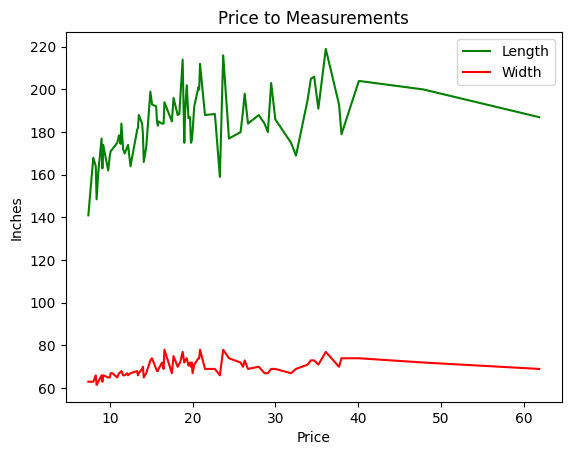

In [ ]:
# 이용 예시입니다. 가격('Price')별 길이('Length')와 너비('Width')를 나타낸 선 그래프를 그립니다. 가격이 일치하는 경우, 각 값의 평균을 이용합니다. 결측값이 있는 경우 버립니다.

# 사용할 데이터를 지정합니다.
go = df2.groupby('Price')[['Length', 'Width']].mean().dropna()
xo = go.index
yo1 = go['Length']
yo2 = go['Width']

# 하나의 Axes를 가지는 Figure를 생성합니다. Figure는 그림 전체, Axes는 그림 내 그래프가 그려지는 하나의 공간을 지칭합니다. matplotlib 링크를 확인하세요.
fig, ax = plt.subplots()

# Axes에 x=Price, y=Length로 하여 선 그래프를 하나 그립니다. 선의 label은 'Length', 선의 색은 'green'으로 합니다.
ax.plot(xo, yo1, label = 'Length', color = 'green')
# Axes에 x=Price, y=Width로 하여 선 그래프를 하나 그립니다. 선의 label은 'Width', 선의 색은 'red'로 합니다.
ax.plot(xo, yo2, label = 'Width', color = 'red')

# Axes의 title을 지정합니다.
ax.set_title("Price to Measurements")
# Axes의 x축에 붙일 label을 지정합니다.
ax.set_xlabel("Price")
# Axes의 y축에 붙일 label을 지정합니다.
ax.set_ylabel("Inches")

# 앞서 Axes의 각 선 그래프에 붙인 label을 표기할 범례(legend)를 추가하도록 합니다.
ax.legend()

# 플롯을 출력합니다. (환경에 따라 생략 가능합니다.)
plt.show()

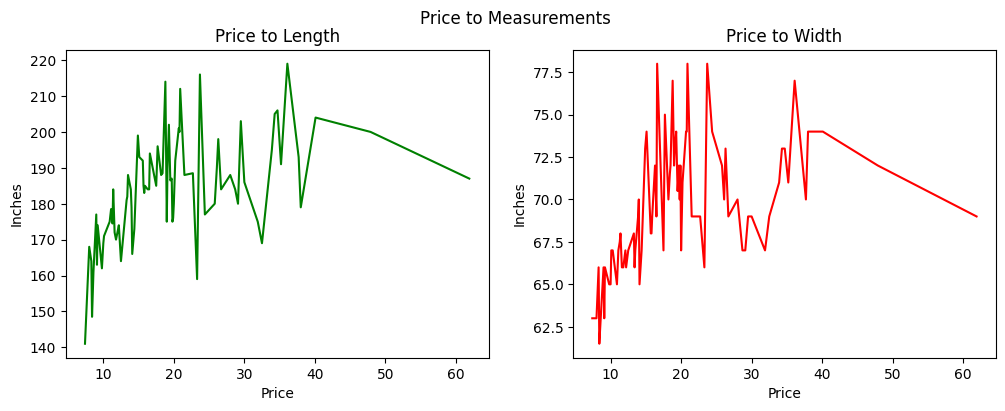

In [ ]:
# Axes를 여럿 이용하는 예시입니다. 위와 조건은 같으나, 각 선 그래프를 서로 다른 Axes에 그립니다.

# 1x2 레이아웃으로 Axes를 가지는 Figure를 생성합니다.
fig, axs = plt.subplots(1, 2, figsize = (12, 4))

# 0번 Axes에 x=Price, y=Length로 하여 선 그래프를 하나 그립니다. 선의 색은 'green'으로 합니다.
axs[0].plot(xo, yo1, color = 'green')
# 1번 Axes에 x=Price, y=Width로 하여 선 그래프를 하나 그립니다. 선의 색은 'red'로 합니다.
axs[1].plot(xo, yo2, color = 'red')

# 모든 Axes에 대해 적용합니다.
for ax in axs:
  # Axes의 x축의 label은 Price로 합니다.
  ax.set_xlabel("Price")
  # Axes의 y축의 label은 Inches로 합니다.
  ax.set_ylabel("Inches")

# 0번 Axes의 title을 지정합니다.
axs[0].set_title("Price to Length")
# 1번 Axes의 title을 지정합니다.
axs[1].set_title("Price to Width")

# Figure 전체의 title을 지정합니다.
plt.suptitle("Price to Measurements")

# 플롯을 출력합니다.
plt.show()

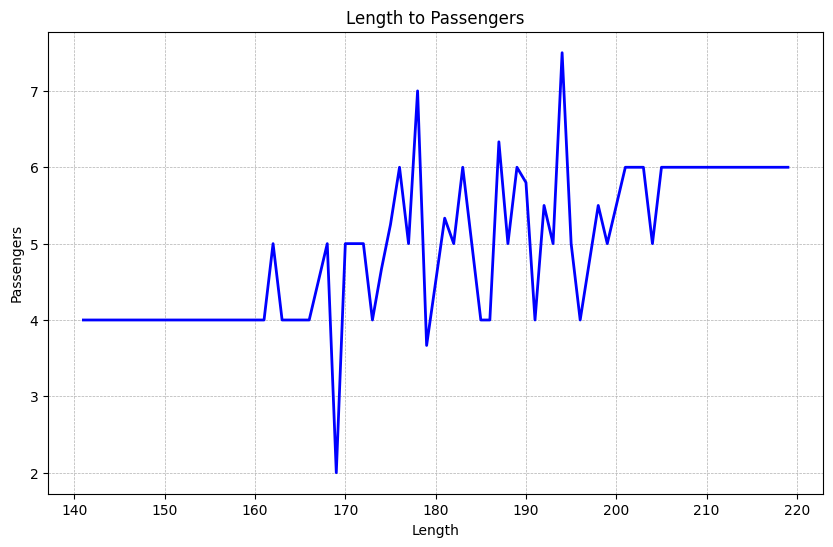

In [ ]:
# 2-1. Length(x)에 따른 Passengers(y) 선 그래프를 그리세요. x와 y는 주어져 있습니다.
# Axes의 title은 'Length to Passengers'로, X축의 label은 'Length', Y축의 label은 'Passengers'로 지정하세요.
g1 = df2.groupby('Length')['Passengers'].mean().dropna()
x1 = g1.index
y1 = g1.values

###### 위는 수정하지 마세요.
plt.figure(figsize=(10,6))
plt.plot(x1, y1, color='blue', linewidth=2)
plt.title('Length to Passengers')
plt.xlabel('Length')
plt.ylabel('Passengers')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)



###### 아래는 수정하지 마세요.

plt.show()

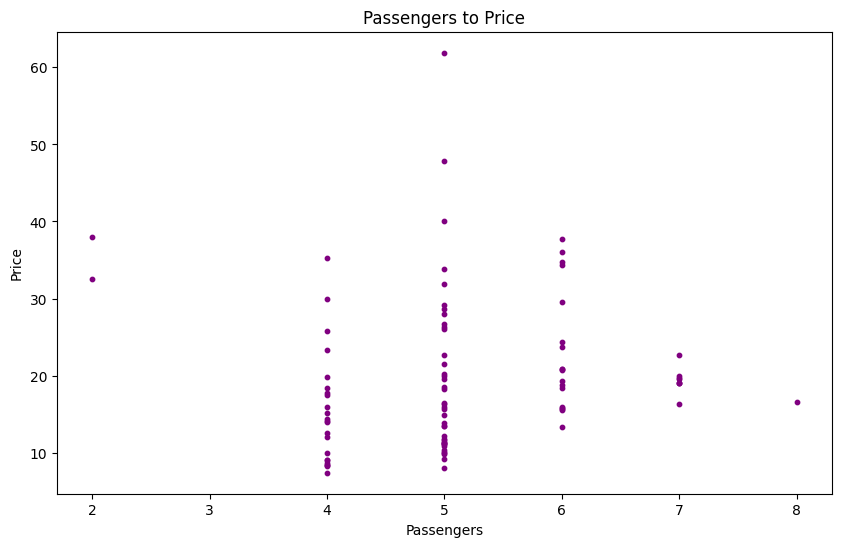

In [ ]:
# 2-2. Passengers(x)에 따른 Price(y) 산점도(scatter)를 그리세요. x와 y는 주어져 있습니다.
# Axes의 title은 'Passengers to Price'로, x축의 label은 'Passengers', y축의 label은 'Price'로 지정하세요.
# 점의 색은 'purple'로, 크기는 파라미터 기준 10으로 지정하세요.
x2 = df2['Passengers'].dropna()
y2 = df2.loc[x2.index]['Price']

###### 위는 수정하지 마세요.
# 산점도(scatter) 작성
plt.figure(figsize=(10,6))
plt.scatter(x2, y2, color='purple', s=10)

# 제목 및 레이블 설정
plt.title('Passengers to Price')
plt.xlabel('Passengers')
plt.ylabel('Price')


###### 아래는 수정하지 마세요.

plt.show()

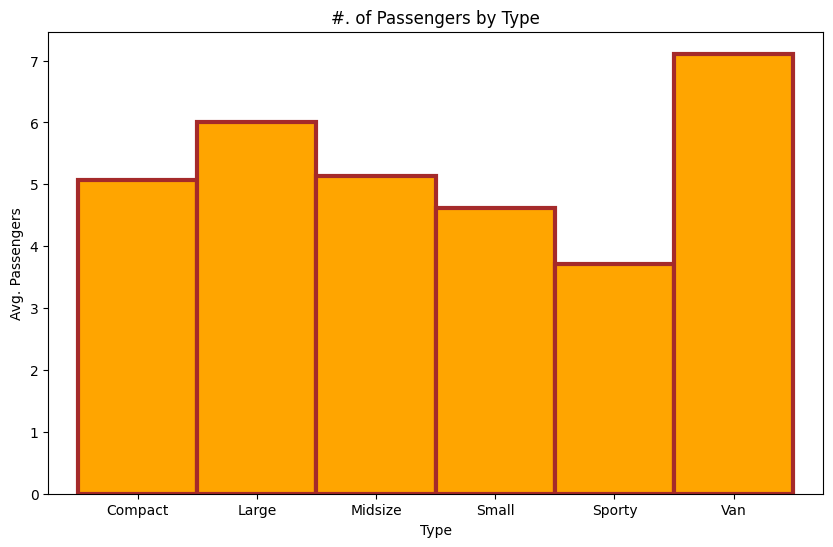

In [ ]:
# 2-3. Type(x)별 Passengers의 평균(y)을 보이는 막대 그래프(bar)를 그리세요. x와 y는 주어지지 않습니다. 결측값이 있는 경우 버리세요.
# 각 막대간 간격이 없도록 너비를 조정하세요.
# 각 막대의 외곽선 색깔은 'brown', 외곽선의 굵기는 3로 조정하세요.
# 각 막대의 색깔은 'orange'로 지정하세요.
# Axes의 title은 '#. of Passengers by Type'으로, x축 label은 Type, y축 label은 Avg. Passengers로 지정하세요.
# Type별 Passengers의 평균 계산
g2 = df2.groupby('Type')['Passengers'].mean().dropna()

# 막대 그래프 작성
plt.figure(figsize=(10,6))
g2.plot(kind='bar', color='orange', edgecolor='brown', linewidth=3, width=1)
plt.xticks(rotation=0)

# 제목 및 레이블 설정
plt.title('#. of Passengers by Type')
plt.xlabel('Type')
plt.ylabel('Avg. Passengers')

###### 아래는 수정하지 마세요.

plt.show()

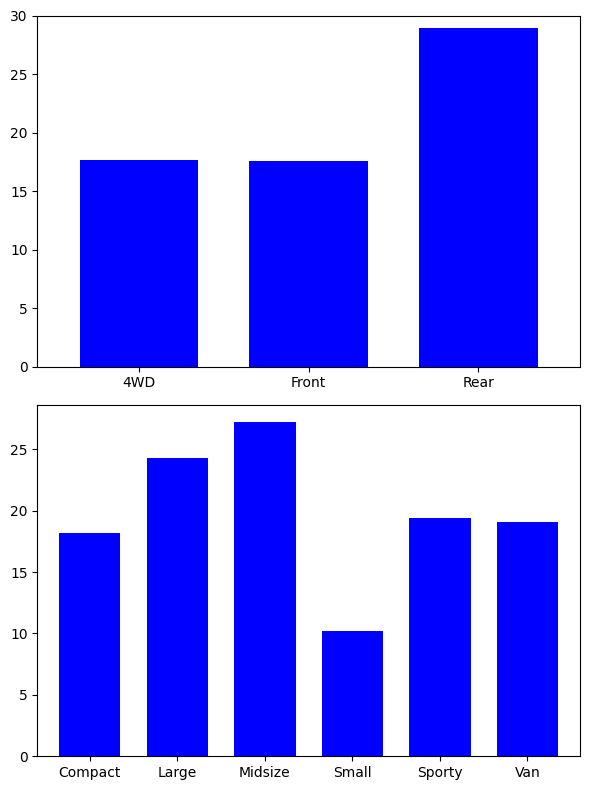

In [ ]:
# 2-4. DriveTrain(x1)별 Price의 평균(y)을 보이는 막대 그래프를 가진 Axes(0번 Axes로 지칭합니다.)와,
# Type(x2)별 Price의 평균(y)을 보이는 막대 그래프를 가진 Axes(1번 Axes로 지칭합니다.)를 포함하는 2x1 Figure를 그리세요. figsize = (6, 8)입니다.
# x와 y는 주어지지 않습니다. 결측값이 있는 경우 버리세요.
# label 등의 다른 조건은 없습니다.
# 데이터 준비

# 아래의 코드로 실행하면 Van이 제거됨 -> 조건에 맞는 그래프 X
# 데이터 프레임에서 DriveTrain별로 Price의 평균을 계산
#drive_train_avg = df2.dropna().groupby('DriveTrain')['Price'].mean()

# 데이터 프레임에서 Type별로 Price의 평균을 계산
#type_avg = df2.dropna().groupby('Type')['Price'].mean()

# 데이터 프레임에서 DriveTrain별로 Price의 평균을 계산
drive_train_avg = df2.dropna(subset=['DriveTrain', 'Price']).groupby('DriveTrain')['Price'].mean()

# 데이터 프레임에서 Type별로 Price의 평균을 계산
type_avg = df2.dropna(subset=['Type', 'Price']).groupby('Type')['Price'].mean()


# 그래프 그리기
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

# 0번 Axes에 DriveTrain별 Price의 평균을 막대 그래프로 표현
drive_train_avg.plot(kind='bar', ax=axes[0], color='blue', width=0.7)
axes[0].set_xlabel('')  # x축 라벨 제거
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)  # x축 틱 라벨 방향 변경
axes[0].set_ylim(0, 30)
# 1번 Axes에 Type별 Price의 평균을 막대 그래프로 표현
type_avg.plot(kind='bar', ax=axes[1], color='blue', width=0.7)
axes[1].set_xlabel('')  # x축 라벨 제거
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)  # x축 틱 라벨 방향 변경

plt.tight_layout()

###### 아래는 수정하지 마세요.

plt.show()


## **3. 시계열 데이터의 시각화**

---

특정 주기마다 수집된 데이터를 시각화하는 방법을 연습합니다. 주석과 링크를 참조해 문제를 푸세요.

---

[df.resample()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) <br>
[df.resample()의 용례 - StackOverflow](https://stackoverflow.com/questions/41749544/how-to-resample-a-time-series-per-decades-in-python)

In [ ]:
df3 = df_eco.copy(deep = True)
df3['date'] = pd.to_datetime(df3['date'])
df3


,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12122.0,320201,5.0,12.6,8688
570,2015-01-01,12080.8,320367,5.5,13.4,8979
571,2015-02-01,12095.9,320534,5.7,13.1,8705
572,2015-03-01,12161.5,320707,5.2,12.2,8575


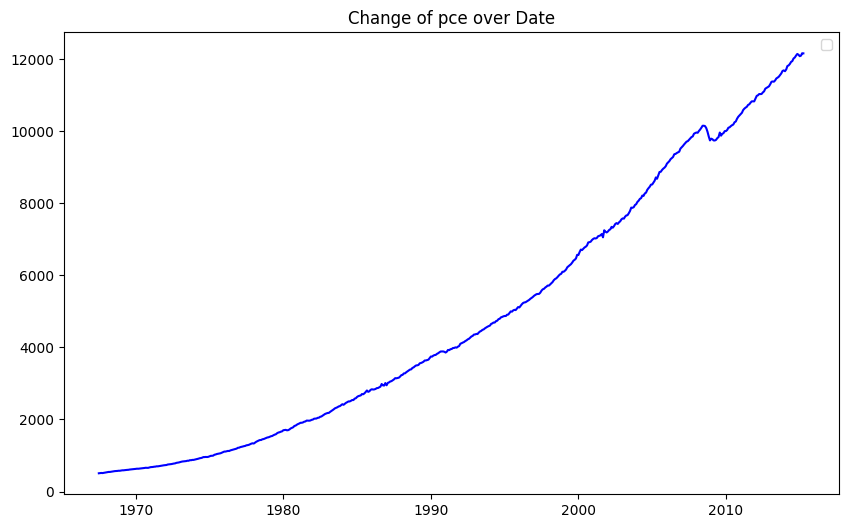

In [ ]:
# 3-1. Datetime으로 구성된 'date'에 따른 'pce'의 변화에 대한 선 그래프를 그리세요.
plt.figure(figsize=(10,6))
plt.plot(df3['date'], df3['pce'], color='blue')
plt.title('Change of pce over Date')
plt.legend()

###### 아래는 수정하지 마세요.

plt.show()

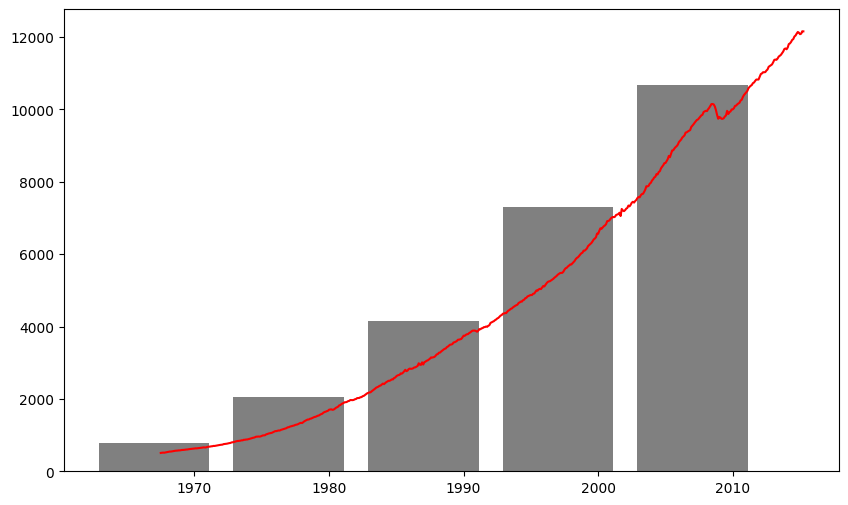

In [ ]:
# 3-2. 'date'에 따른 'pce'의 변화에 대한 선 그래프와, 1967-01-01을 시작으로 10년씩 묶어 집계한 'pce'의 평균을 나타내는 막대 그래프를 가지는 Axes를 포함한 Figure를 그리세요.
# 선 그래프의 내용은 3-1.의 그래프와 동일하나, 선의 색상을 'red'로 지정하세요.
# 막대 그래프의 너비는 3000으로, 막대의 색상은 'grey'로 지정하세요.
# 막대 그래프가 뒤에(즉, 배경으로 깔리게), 선 그래프가 앞에(즉, 막대의 일부가 선 그래프에 가려지도록) 오도록 그리세요.
# 이용해야할 offset은 '10AS'입니다. 필요에 따라 이용하세요.

# 10년 주기로 'pce'의 평균 계산
pce_avg = df3.resample('10AS', on='date').mean()

# 그래프 그리기
plt.figure(figsize=(10,6))

# 막대 그래프(배경)
plt.bar(pce_avg.index, pce_avg['pce'], width=3000, color='grey')

# 선 그래프(전경)
plt.plot(df3['date'], df3['pce'], color='red', label='pce')

###### 아래는 수정하지 마세요.
plt.show()


###### 아래는 수정하지 마세요.

plt.show()

## **4. 시계열 데이터 전처리**

---

특정 주기마다 수집되었으나, 일부 시점에서 결측치가 발생한 데이터를 interpolate하는 연습을 수행합니다. Interpolation은 간단한 forward fill(이전 레코드의 값을 그대로 이용), backward fill(다음 레코드의 값을 그대로 이용)에 더불어, 스플라인 interpolation(Linear, Quadratic, Cubic) 등, 여러 방법이 있습니다. 데이터의 특징에 따라 각 interpolation 방법의 성능에는 차이가 있습니다. 주석과 링크를 참조하여 문제를 풀어보세요.

---

[df.ffill()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html) <br>
[df.bfill()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html) <br>
[df.interpolate()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [ ]:
import math

df4 = df_eco.copy(deep = True).dropna()
df4['date'] = pd.to_datetime(df4['date'])
df4_org = df4.copy(deep = True)

random.seed(1231)
missing_targ_idx = random.sample(list(df4.index), math.ceil(len(df4) / 100 * 20))

df4.loc[missing_targ_idx] = np.nan
df4['date'] = df4_org['date']

df4

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712.0,12.5,4.5,2944.0
1,1967-08-01,NaN,NaN,NaN,NaN,NaN
2,1967-09-01,516.3,199113.0,11.7,4.6,2958.0
3,1967-10-01,512.9,199311.0,12.5,4.9,3143.0
4,1967-11-01,518.1,199498.0,12.5,4.7,3066.0
...,...,...,...,...,...,...
569,2014-12-01,NaN,NaN,NaN,NaN,NaN
570,2015-01-01,NaN,NaN,NaN,NaN,NaN
571,2015-02-01,12095.9,320534.0,5.7,13.1,8705.0
572,2015-03-01,12161.5,320707.0,5.2,12.2,8575.0


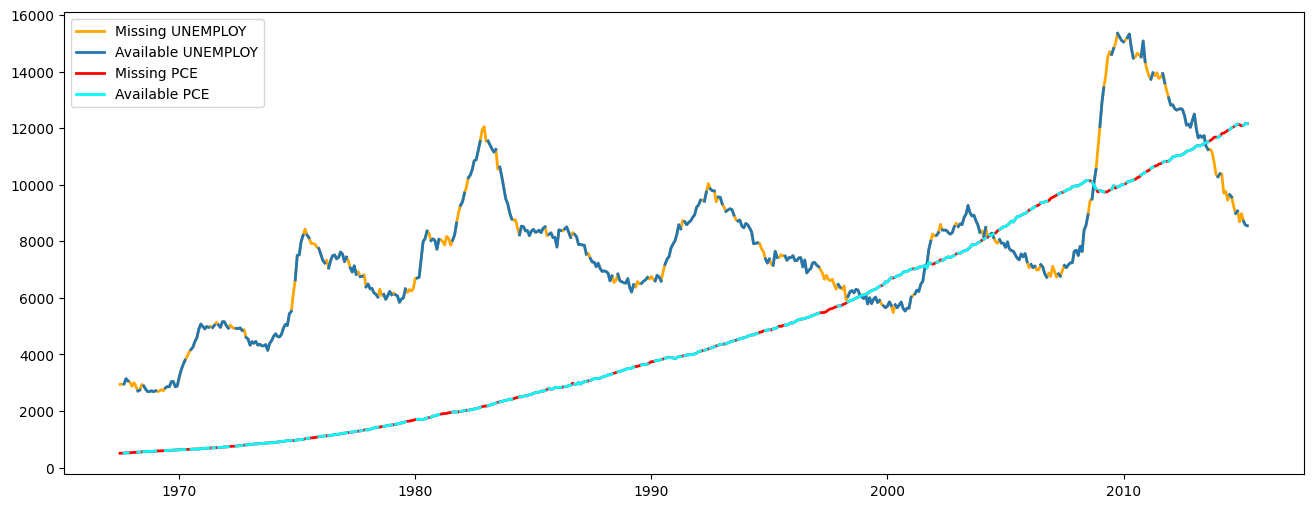

In [ ]:
# df4는 시계열 데이터이나, 결측값을 가집니다.
fig, ax = plt.subplots(figsize = (16, 6))

ax.plot(df4_org['date'], df4_org['unemploy'], color = 'orange', linewidth = 2, label = 'Missing UNEMPLOY')
ax.plot(df4['date'], df4['unemploy'], linewidth = 2, label = 'Available UNEMPLOY')
ax.plot(df4_org['date'], df4_org['pce'], color = 'red', linewidth = 2, label = 'Missing PCE')
ax.plot(df4['date'], df4['pce'], color = 'cyan', linewidth = 2, label = 'Available PCE')

ax.legend(loc = 'upper left')

plt.show()

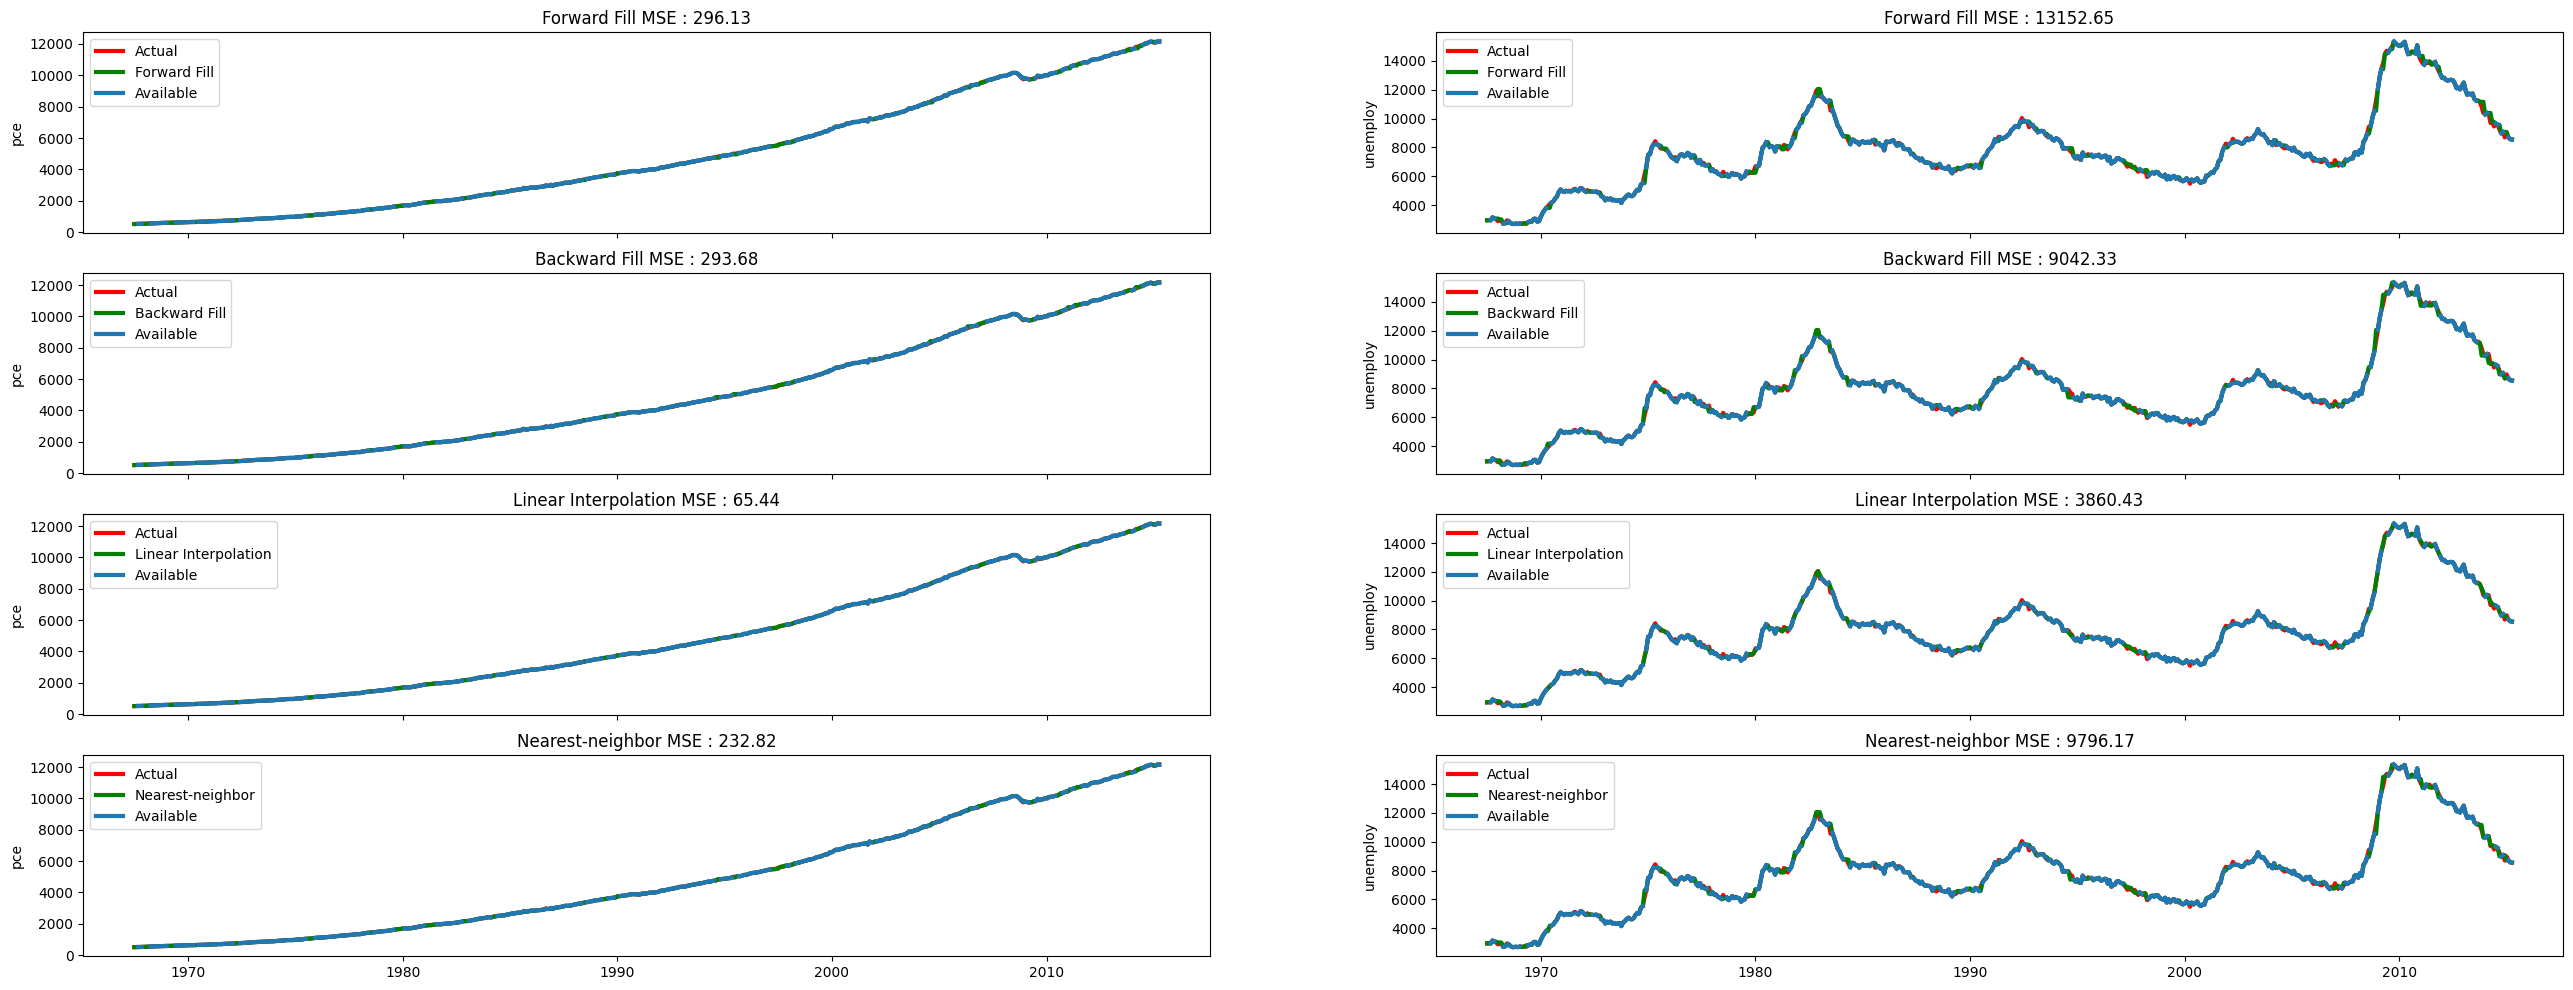

In [ ]:
# 4. 'unemploy'에 대한 interpolation을 수행하여, 결측값을 예측해보도록 합니다.
# 링크를 참조해, Forward Fill, Backward Fill, Linear Interpolation, Nearest-neighbor Interpolation을 df4_targ를 이용해 수행해보세요.
df4_targ = df4.set_index('date')

###### 위는 수정하지 마세요.

# Forward Fill
df4_ffill = df4_targ.fillna(method='ffill')

# Backward Fill
df4_bfill = df4_targ.fillna(method='bfill')

# Linear Interpolation
df4_lin = df4_targ.interpolate(method='linear')

# Nearest-neighbor Interpolation
df4_near = df4_targ.interpolate(method='nearest')

###### 아래는 수정하지 마세요.

from sklearn.metrics import mean_squared_error

titles = ['pce', 'unemploy']
methods = ['Forward Fill', 'Backward Fill', 'Linear Interpolation', 'Nearest-neighbor']

dfs = [df4_ffill, df4_bfill, df4_lin, df4_near]
scores = [
    [
        np.round(mean_squared_error(df4_org[titles[j]], dfs[i][titles[j]]), 2) for j in range(2)
    ] for i in range(4)
]

fig, axs = plt.subplots(4, 2, sharex = True, figsize = (32, 12))

for i in range(4):
  for j in range(2):
    axs[i, j].plot(df4_org['date'], df4_org[titles[j]], color = 'red', linewidth = 3, label = 'Actual')
    axs[i, j].plot(dfs[i].index, dfs[i][titles[j]], color = 'green', linewidth = 3, label = methods[i])
    axs[i, j].plot(df4['date'], df4[titles[j]], linewidth = 3, label = 'Available')

    axs[i, j].set_title(methods[i] + ' MSE : ' + str(scores[i][j]))
    axs[i, j].set_ylabel(titles[j])

    axs[i, j].legend()

plt.show()

In [ ]:
# interpolation의 결과를 보면(MSE는 Mean Squared Error로, 값이 작을수록 실제 값에 가깝게 interpolate 된 것입니다.)
# 동일한 방법을 이용하더라도 대상 값의 변동 수준 및 트렌드에 따라서 interpolation의 성능이 차이가 남을 확인할 수 있습니다.
# 같은 선상에서, 변동의 특성에 따라 효과적인 interpolation 방법이 다를 수 있음을 확인할 수 있습니다.